### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

data_directory = '../Data'

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).

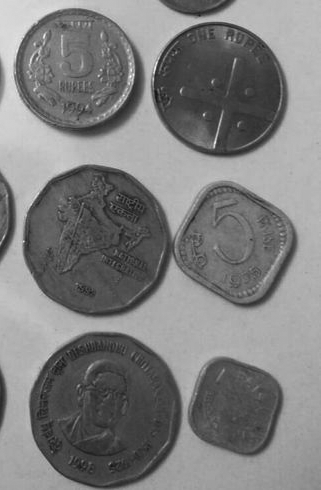

In [5]:
coins = cv2.imread(f'{data_directory}/Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

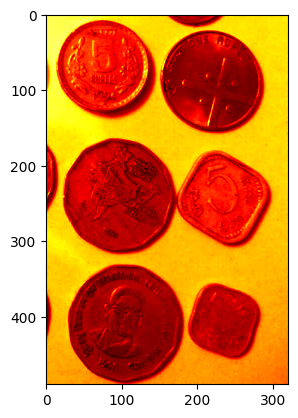

In [6]:
plt.imshow(coins, cmap='hot') # przykład wyświetlania z mapą kolorów

---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów poprzez detekcję krawędzi. Wykorzystaj filtr Canny'ego dla różnych wartości progów oraz filtry redukcji szumu.

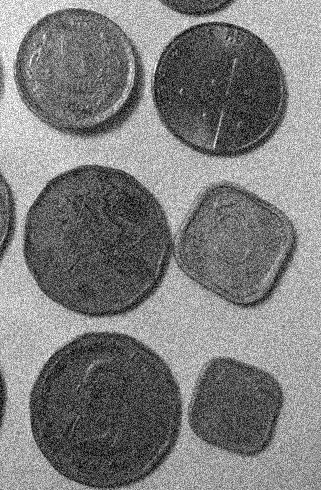

In [7]:
coins_noise = cv2.imread(f'{data_directory}/Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

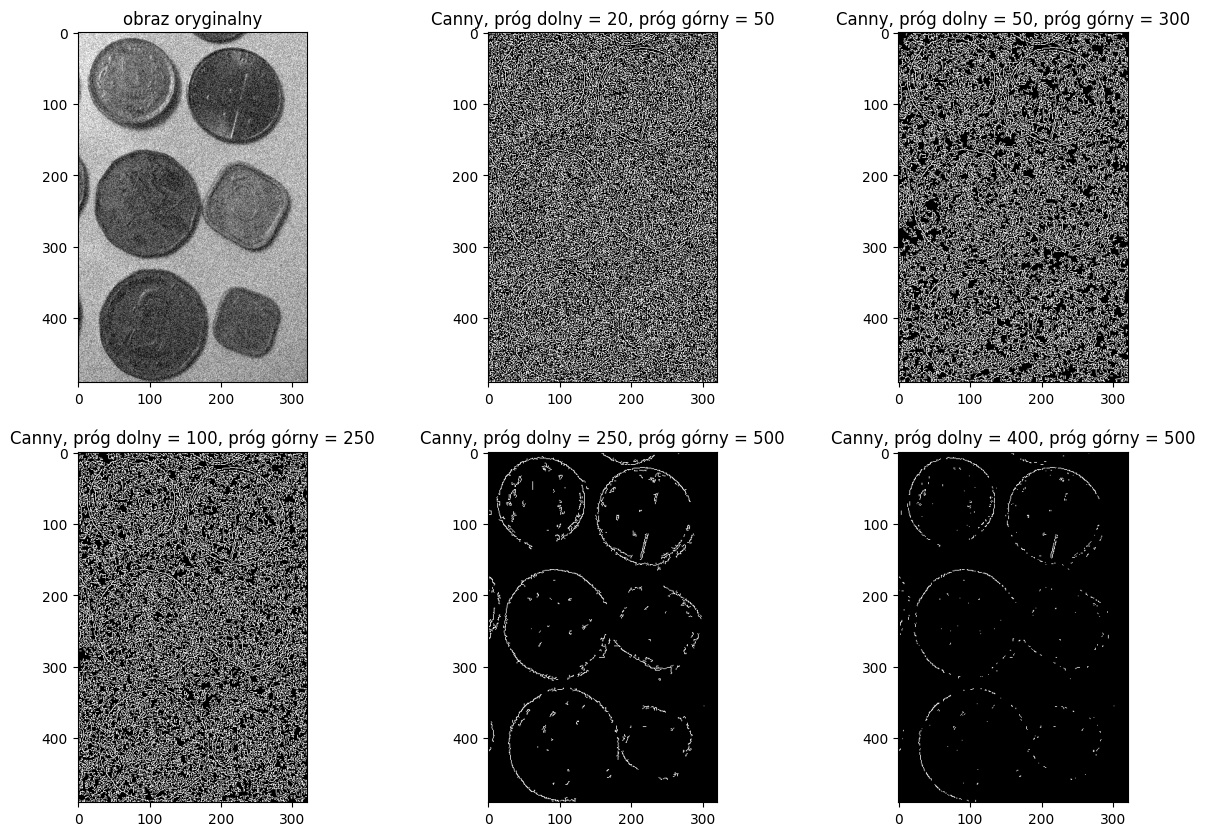

In [13]:
#Detekcja krawędzi metodą Canny'ego - wynik zależy od doboru wartości progów:
f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)
f.set_figwidth(15)
f.set_figheight(10)

a1.imshow(coins_noise, cmap='gray');
a1.set_title('obraz oryginalny')

for ax, t1, t2 in zip([a2, a3, a4, a5, a6], [20, 50, 100, 250, 400], [50, 300, 250, 500, 500]):
    ax.imshow(cv2.Canny(image=coins_noise, threshold1=t1, threshold2 = t2), cmap='gray');
    ax.set_title('Canny, próg dolny = {}, próg górny = {}'.format(t1, t2))

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów.

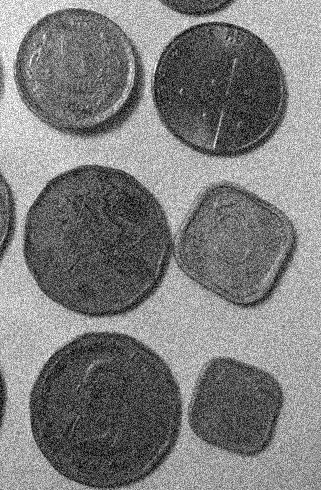

In [23]:
Image.fromarray(coins_noise)

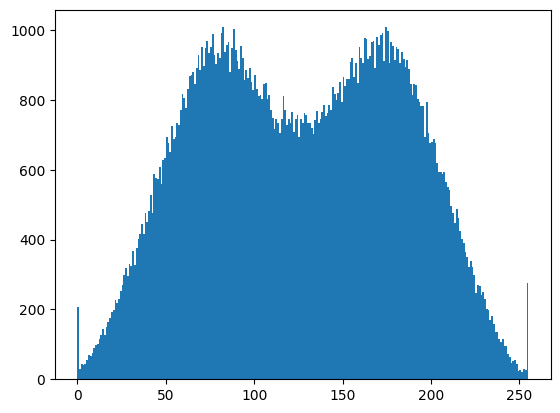

In [24]:
# Histogram wartosci
_ = plt.hist(coins_noise.flatten(), bins=255)
plt.show()

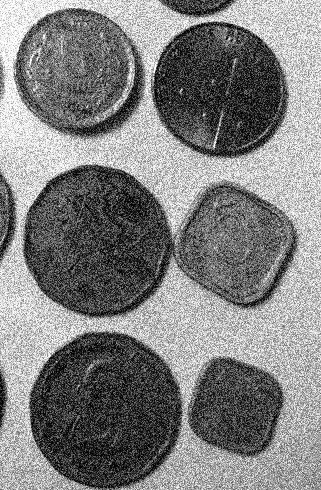

In [25]:
equ = cv2.equalizeHist(coins_noise)
Image.fromarray(equ)

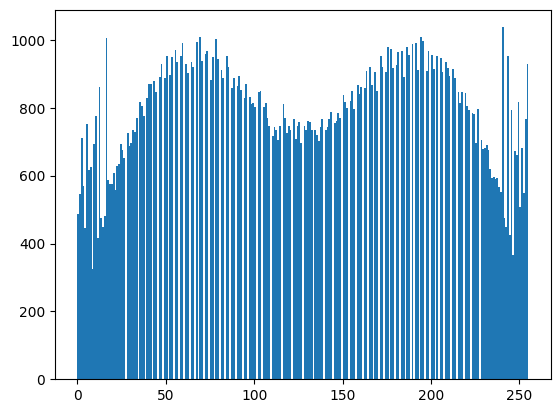

In [26]:
# Histogram wartosci
_ = plt.hist(equ.flatten(), bins=255)
plt.show()

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazów `hare_gray` i `hare_color` wykonaj transformacje na składowych S i/lub V modelu HSV, przechodząc do wybranego (założonego) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu.

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

**4A** (`hare_gray`):

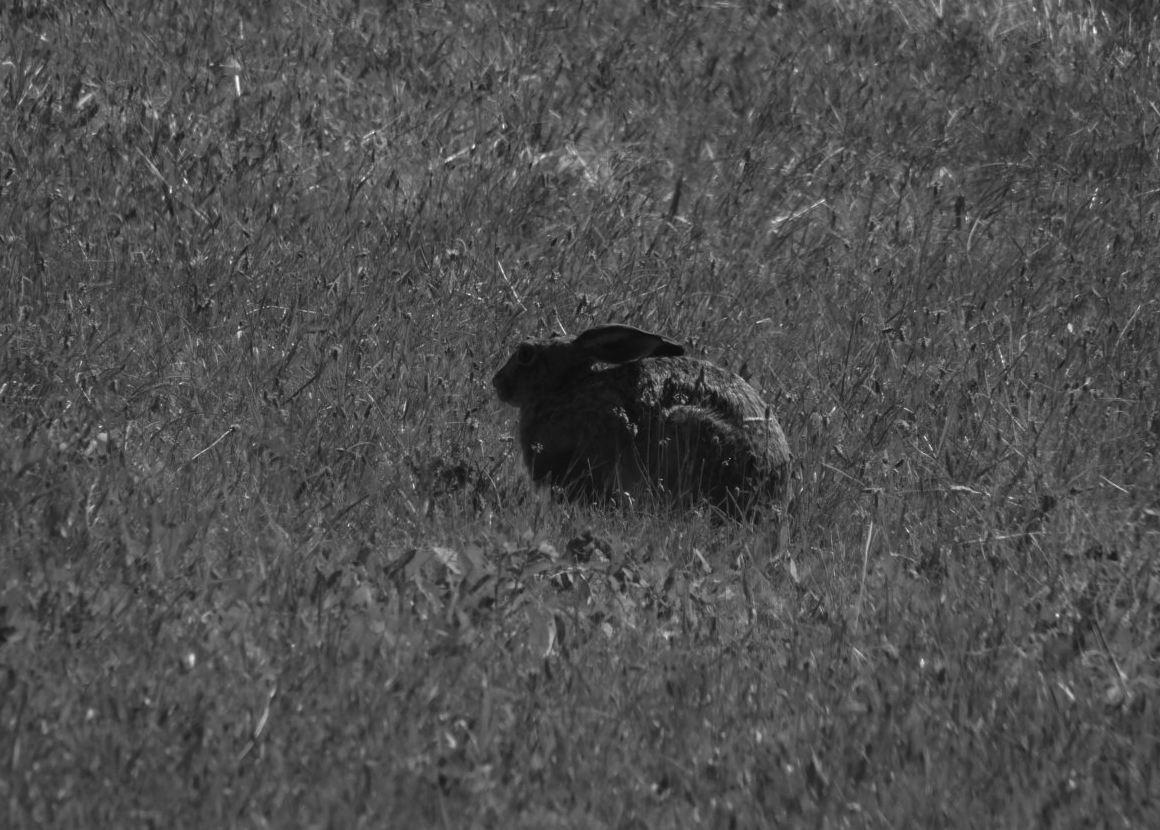

In [5]:
hare_gray = cv2.imread(f'{data_directory}/Zajac.jpg', cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

Rozwiązanie:

---

**4B** (`hare_color`):

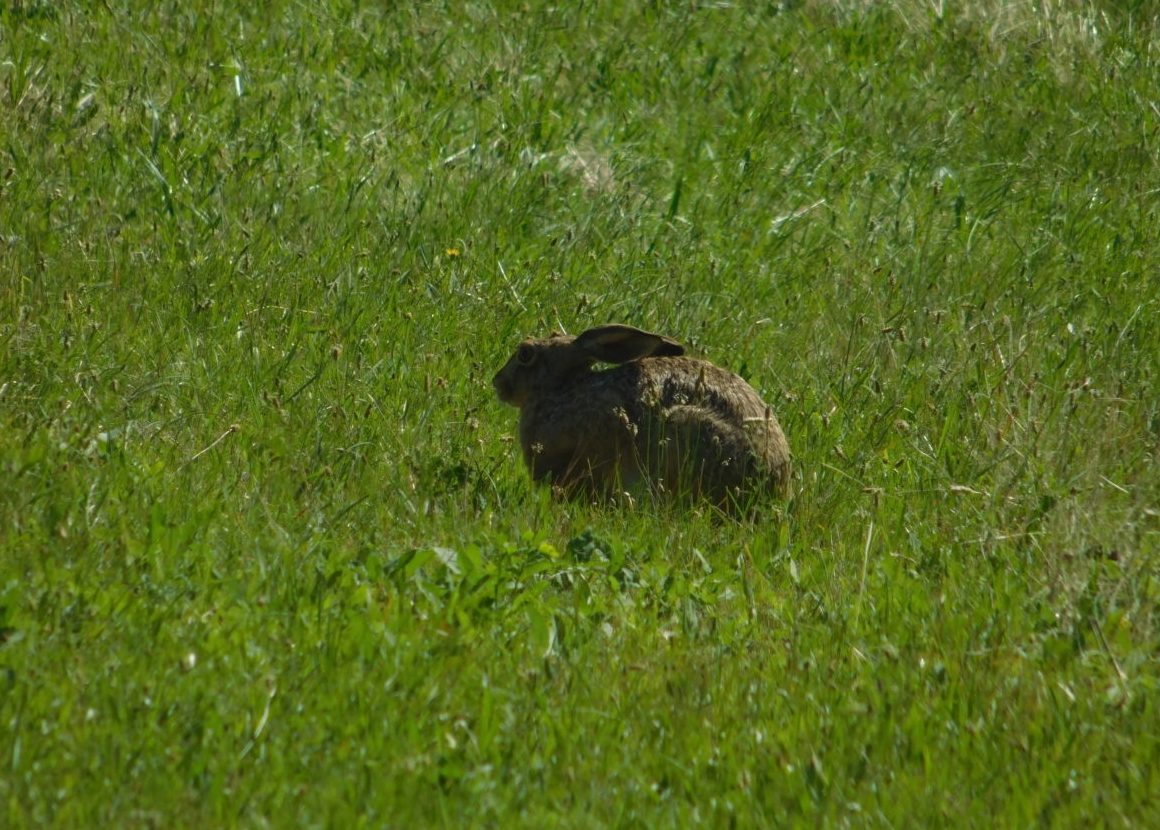

In [6]:
hare_color = cv2.imread(f'{data_directory}/Zajac_kolor.jpg')
Image.fromarray(hare_color[..., ::-1])

Rozwiązanie: